In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import utilities

In [2]:
# Set a fixed rondom seed number
from numpy.random import seed
seed(1)

In [3]:
# Import data into the workspace
data = pd.read_csv('FB_stock_history.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0


# Basic Statistics of data

In [4]:
# Display the number of records and features for the data
print("Number of records: " , data.shape[0])
print("Number of features: " , data.shape[1])

Number of records:  2359
Number of features:  8


In [5]:
# Display the basic info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2359 non-null   object 
 1   Open          2359 non-null   float64
 2   High          2359 non-null   float64
 3   Low           2359 non-null   float64
 4   Close         2359 non-null   float64
 5   Volume        2359 non-null   int64  
 6   Dividends     2359 non-null   int64  
 7   Stock Splits  2359 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 147.6+ KB


In [6]:
# Display the basic statistic for the data
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2359.000000,2359.000000,2359.000000,2359.000000,2.359000e+03,2359.0,2359.0
mean,139.606969,141.234324,137.958605,139.656876,3.095630e+07,0.0,0.0
std,84.490691,85.465048,83.566847,84.565640,2.778137e+07,0.0,0.0
min,18.080000,18.270000,17.549999,17.730000,5.913100e+06,0.0,0.0
25%,74.935001,75.565002,74.020000,74.855000,1.564190e+07,0.0,0.0
50%,130.979996,132.259995,129.770004,131.050003,2.220590e+07,0.0,0.0
75%,184.914993,186.830002,183.419998,185.345001,3.597605e+07,0.0,0.0
max,381.679993,384.329987,378.809998,382.179993,5.735764e+08,0.0,0.0


In [7]:
# Display the range of time for this financial data
print("Range of time:  from " + data['Date'].min() + " to "+ data['Date'].max())

Range of time:  from 2012-05-18 to 2021-10-01


In [8]:
# Set the 'Date' as index
data = data[pd.to_datetime(data['Date'])==data['Date']]
data.index = pd.to_datetime(data['Date'])
data = data.drop(['Date'], axis = 1)

In [9]:
# Define year and month for the data
data[['year', 'month']] = [x.timetuple()[:2] for x in data.index.tolist()]

In [10]:
# Display the first 5 row of the data
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month
Date,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0,2012,5
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0,2012,5
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0,2012,5
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0,2012,5
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0,2012,5


In [11]:
# Define style to plot the time series graph for each feature (Open, High, Low and Close)
sns.set(style="darkgrid")

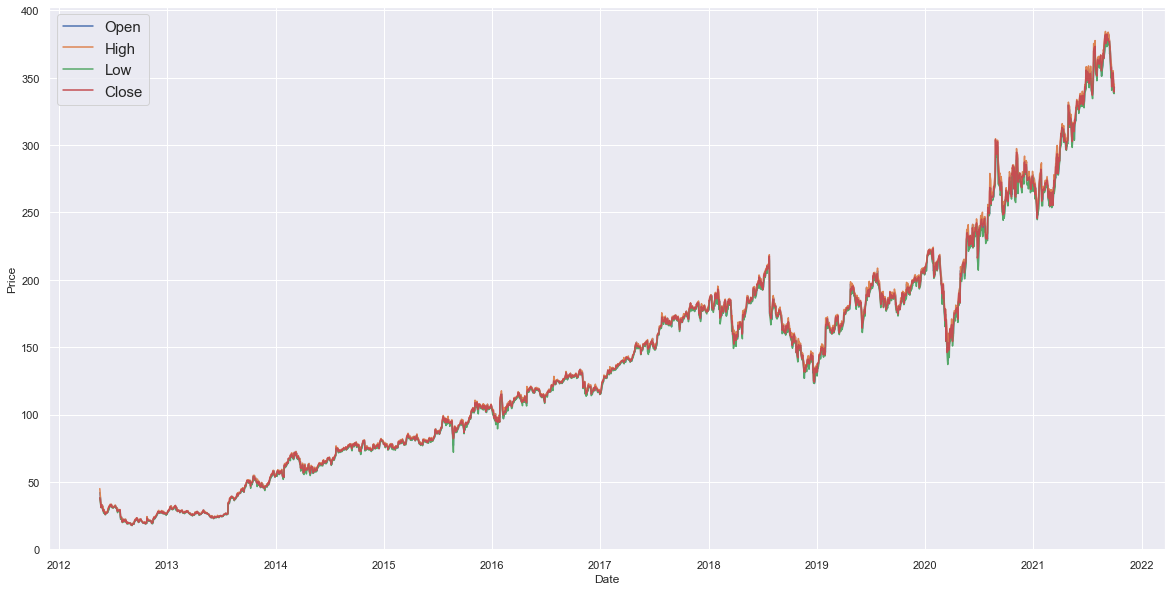

In [12]:
# Plot from day to day manner
utilities.price_plot(data)

In [13]:
# Filter data by month
month_data = data.groupby(pd.Grouper(freq='M')).sum()

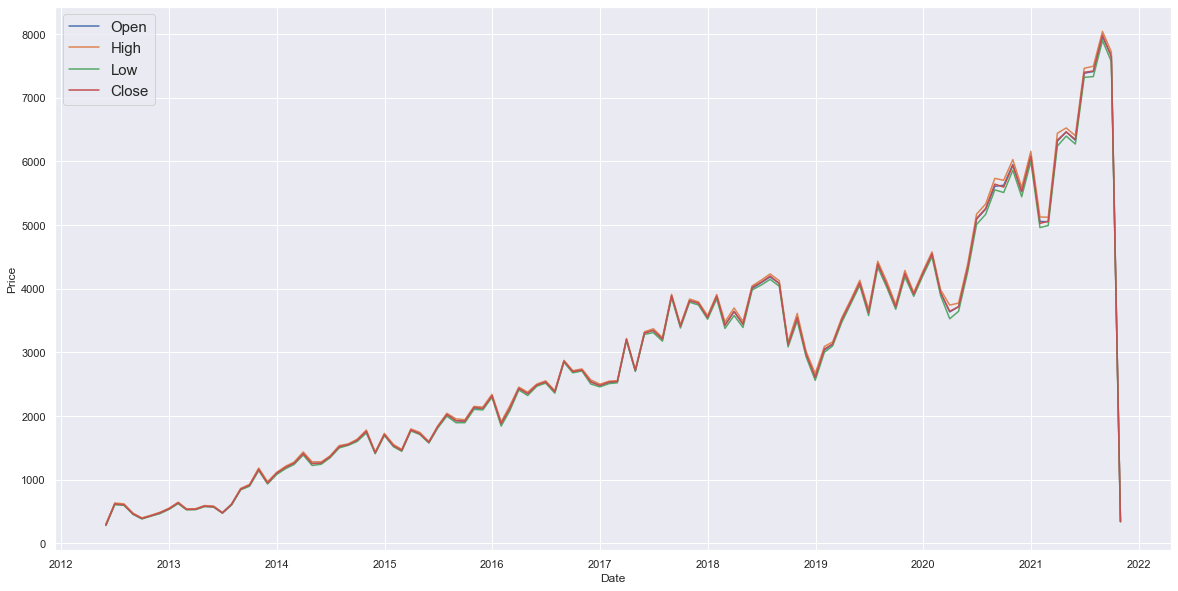

In [14]:
# Display the price plot in monthly manner
utilities.price_plot(month_data)

In [15]:
# Filter data by year
year_data = data.groupby(pd.Grouper(freq='A')).sum()

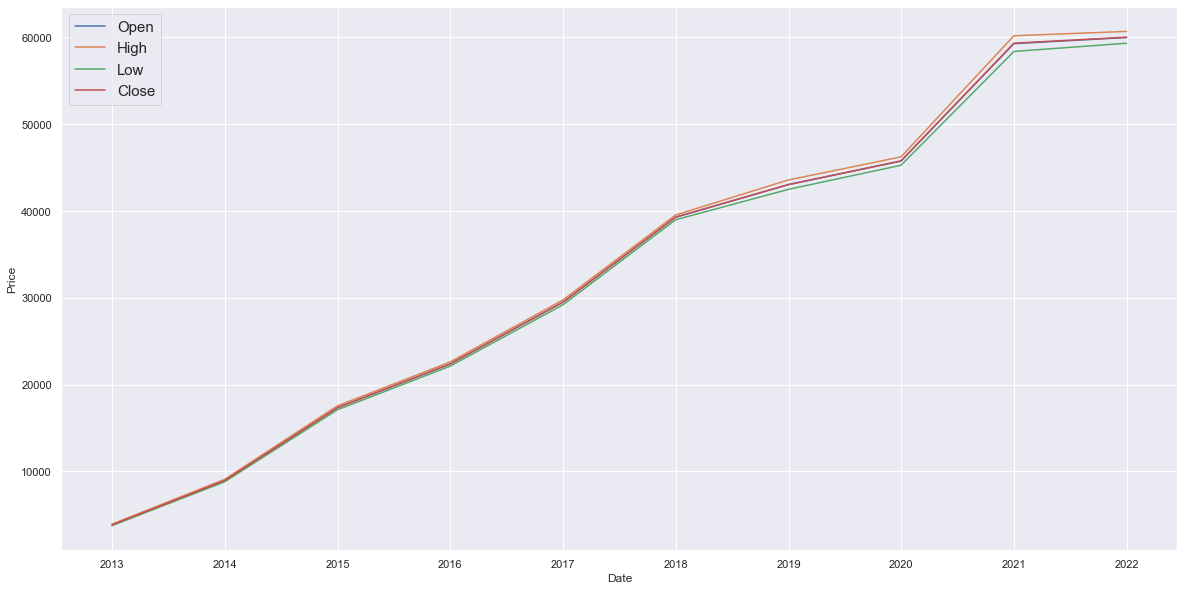

In [16]:
# Display the price plot in yearly manner
utilities.price_plot(year_data)

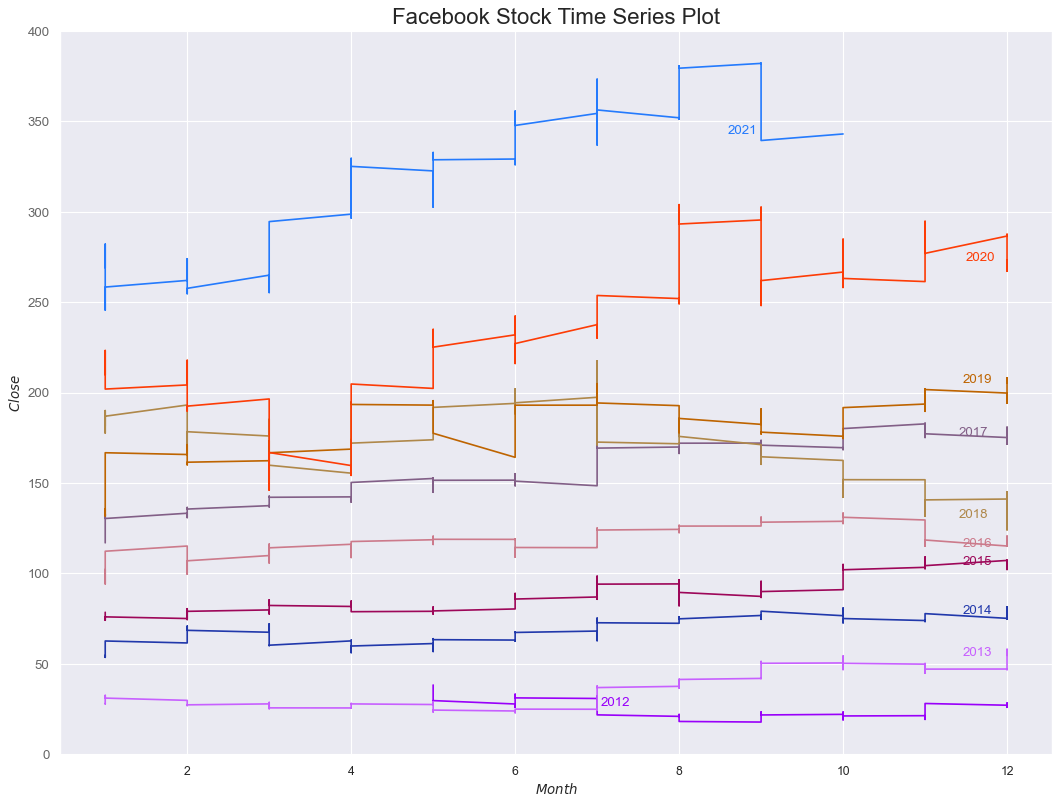

In [17]:
# Prepare data
years = data['year'].unique()

# Prepare Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Plot the data
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    plt.plot('month', 'Close', data=data.loc[data.year==y, :], color=mycolors[i], label=y)
    plt.text(data.loc[data.year==y, :].shape[0]/22, data.loc[data.year==y, 'Close'][-1:].values[0], y, color=mycolors[i])
    
plt.gca().set(ylabel='$Close$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Facebook Stock Time Series Plot", fontsize=20)
plt.show()

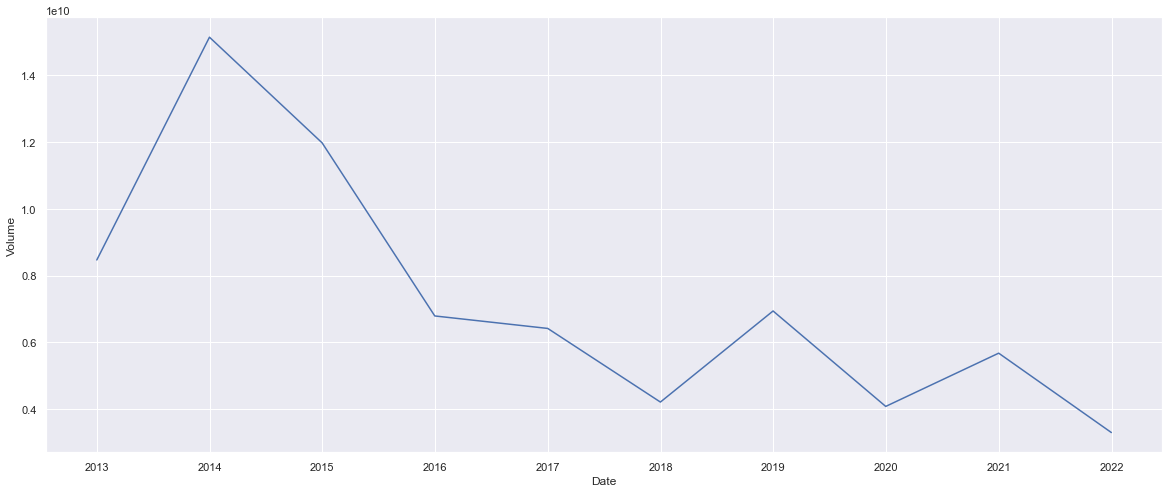

In [18]:
# Display the stock availability (Volume) in yearly manner
fig, ax = plt.subplots(figsize = (20,8))
sns.lineplot(x=year_data.index, y='Volume', data=year_data)
plt.show()

# Data Cleaning

In [19]:
# Remove unwated feature from the data (Dividends and Stock Splits with only 0)
data = data.drop(['Dividends', 'Stock Splits'], axis = 1)
data.head()

,Open,High,Low,Close,Volume,year,month
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,2012,5
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,2012,5
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,2012,5
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,2012,5
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,2012,5


In [20]:
# Check for null value in the dataset
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
year      0
month     0
dtype: int64

In [21]:
# Check for duplicated data
print("Duplicated data: ", data.duplicated().sum())

Duplicated data:  0


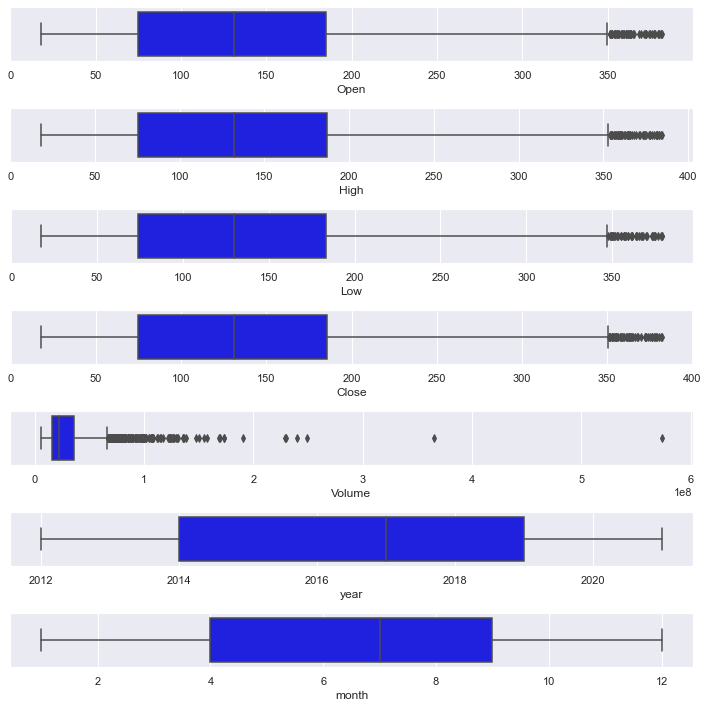

In [22]:
# Display the boxplot for every feature
utilities.boxplot(data,"blue")

<AxesSubplot:>

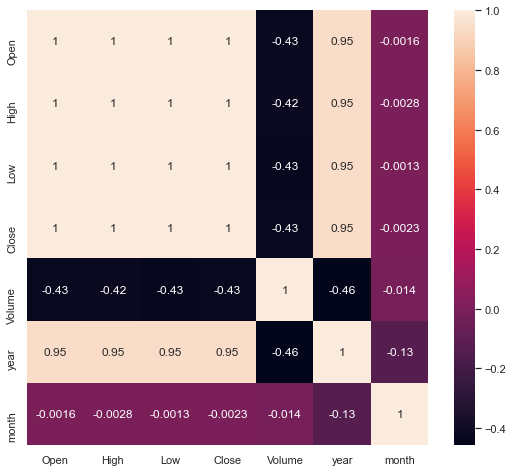

In [23]:
# Measure correlations for each pair of feature
corr = data.corr()

plt.figure(figsize=(9,8))
sns.heatmap(corr, annot=True)

In [24]:
# Create a OLS statistics test to get the p value with respect to 'Open' feature
X = data[['High', 'Low', 'Close', 'Volume']]
Y = data['Open']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

pval_d = {}
for i in X.columns.tolist():
    pval_d[f'{i}'] = model.pvalues[i]

df_pvalue= pd.DataFrame(pval_d.items(), columns=['Variable', 'p Value']).sort_values(by = 'p Value').reset_index(drop=True)
display(df_pvalue)

,Variable,p Value
0,High,0.000000e+00
1,Low,0.000000e+00
2,Close,2.342354e-182
3,const,3.621150e-01
4,Volume,8.178816e-01


In [25]:
# Remove the feature that is less correlated to the 'Open' price
new_data = data.drop(['Volume', 'year', 'month'], axis = 1)

In [26]:
# Display the shape of the new dataset
new_data.shape

(2359, 4)

In [27]:
# Set the date as a variable to plot the data
date = new_data.index

# SVM

## Method 1 (Scale -> Split -> Train)

In [28]:
# Normalize the price (High, Low and Close)
scaler_X = StandardScaler()
scaled_X = scaler_X.fit_transform(new_data[['High','Low','Close']])

df_price = pd.DataFrame(scaled_X, columns = ['High','Low','Close'])
df_open = pd.DataFrame(new_data, columns = ['Open'])

combined_data = pd.concat([df_open.reset_index(drop=True),df_price.reset_index(drop=True)], axis=1)
combined_data.columns = new_data.columns
combined_data.index = new_data.index
combined_data.describe()

,Open,High,Low,Close
count,2359.000000,2.359000e+03,2.359000e+03,2.359000e+03
mean,139.606969,9.774104e-16,8.795188e-16,7.648726e-16
std,84.490691,1.000212e+00,1.000212e+00,1.000212e+00
min,18.080000,-1.439072e+00,-1.441171e+00,-1.442107e+00
25%,74.935001,-7.685393e-01,-7.652815e-01,-7.664533e-01
50%,130.979996,-1.050281e-01,-9.800941e-02,-1.017990e-01
75%,184.914993,5.336140e-01,5.441276e-01,5.403827e-01
max,381.679993,2.844990e+00,2.882752e+00,2.868476e+00


In [29]:
# Setting training data (from first date until end of 2018)
SVM_training_data = combined_data.loc[:'2019-01-01']
date_train = date[:len(SVM_training_data)]

SVM_X_train = SVM_training_data.drop(['Open'], axis = 1)
SVM_y_train = SVM_training_data['Open']

In [30]:
# Convert the training data into NumPy array
SVM_X_train, SVM_y_train = SVM_X_train.to_numpy(), SVM_y_train.to_numpy()

In [31]:
# Setting testing data (from 2019 to 2021)
SVM_testing_data = combined_data.loc['2019-01-01':]
date_test = date[len(SVM_training_data):]

SVM_X_test = SVM_testing_data.drop(['Open'], axis = 1)
SVM_y_test = SVM_testing_data['Open']

In [32]:
# Convert the testing data into NumPy array
SVM_X_test, SVM_y_test = SVM_X_test.to_numpy(), SVM_y_test.to_numpy()

In [33]:
# Run the experiments 10 times and visualise the RMSE result
for i in range(10):
    print("Experiment ", i+1)
    SVM_pred_train, SVM_pred_test, rmse_SVM_train_1, rmse_SVM_test_1 = \
    utilities.SVM_fit_model(SVM_X_train, SVM_y_train, SVM_X_test, SVM_y_test)
    print(100*"=")

Experiment  1
Root Mean Square Error on training data:   3.5038482769639234
Root Mean Square Error on testing data:   130.01690921702883
Experiment  2
Root Mean Square Error on training data:   3.5038482769639234
Root Mean Square Error on testing data:   130.01690921702883
Experiment  3
Root Mean Square Error on training data:   3.5038482769639234
Root Mean Square Error on testing data:   130.01690921702883
Experiment  4
Root Mean Square Error on training data:   3.5038482769639234
Root Mean Square Error on testing data:   130.01690921702883
Experiment  5
Root Mean Square Error on training data:   3.5038482769639234
Root Mean Square Error on testing data:   130.01690921702883
Experiment  6
Root Mean Square Error on training data:   3.5038482769639234
Root Mean Square Error on testing data:   130.01690921702883
Experiment  7
Root Mean Square Error on training data:   3.5038482769639234
Root Mean Square Error on testing data:   130.01690921702883
Experiment  8
Root Mean Square Error on t

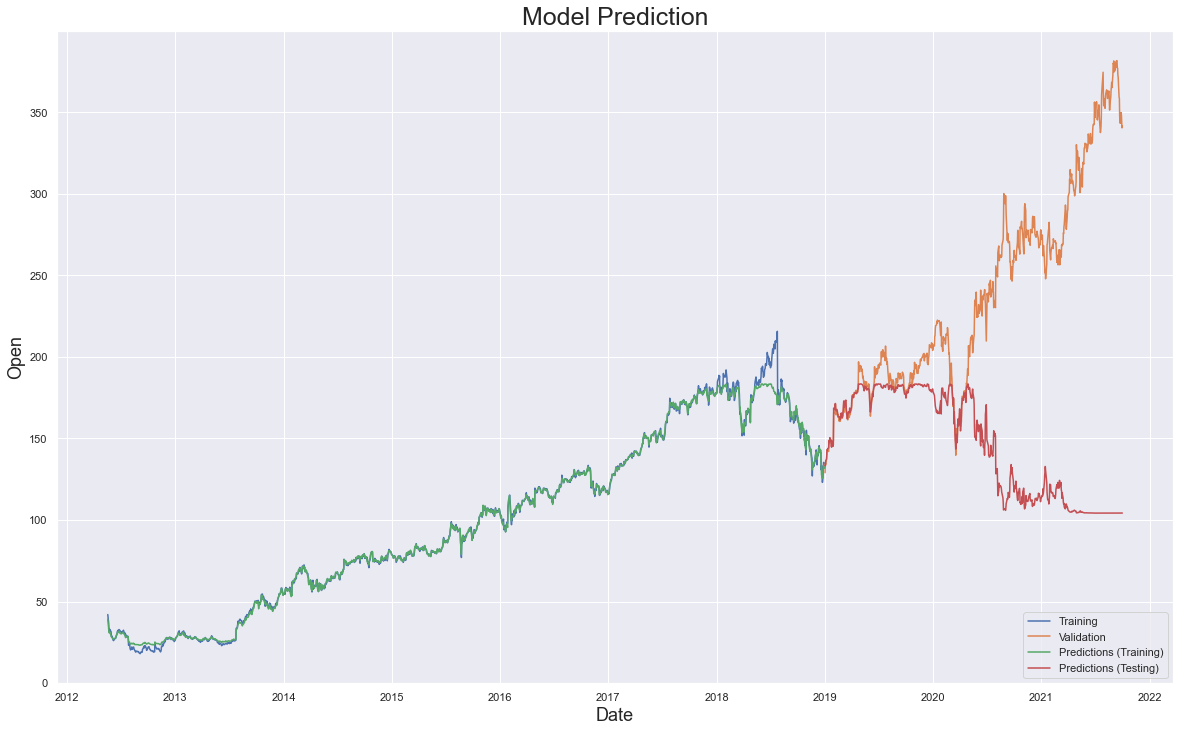

In [34]:
# Plot and visualize data
utilities.visualize(SVM_y_train, SVM_y_test, SVM_pred_train, SVM_pred_test, date_train, date_test)

## Method 2 (Split -> Scale -> Train) (More related to real world application)

In [35]:
# Display the first 5 rows of the data
new_data.head()

,Open,High,Low,Close
Date,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000
2012-05-21,36.529999,36.660000,33.000000,34.029999
2012-05-22,32.610001,33.590000,30.940001,31.000000
2012-05-23,31.370001,32.500000,31.360001,32.000000
2012-05-24,32.950001,33.209999,31.770000,33.029999


In [36]:
# Set the scaler for training data
scaler_X_SVM_2 = StandardScaler()

In [37]:
# Split data before scaling (Method 2)
SVM_training_data_no_scaled = new_data.loc[:'2019-01-01']

In [38]:
# Split data before scaling (Method 2)
SVM_X_train_scaled = SVM_training_data_no_scaled.drop(['Open'], axis = 1)
SVM_y_train_scaled = SVM_training_data_no_scaled['Open'].to_numpy()

SVM_X_train_scaled = scaler_X_SVM_2.fit_transform(SVM_X_train_scaled.to_numpy())

In [39]:
# Split data before scaling (Method 2)
SVM_testing_data_no_scaled = new_data.loc['2019-01-01':]

In [40]:
# Split data before scaling (Method 2)
SVM_X_test_scaled = SVM_testing_data_no_scaled.drop(['Open'], axis = 1)
SVM_y_test_scaled = SVM_testing_data_no_scaled['Open'].to_numpy()

SVM_X_test_scaled = scaler_X_SVM_2.transform(SVM_X_test_scaled.to_numpy())

In [41]:
# Run the experiments 10 times and get the RMSE result
for i in range(10):
    print("Experiment ", i+1)
    SVM_pred_train_2, SVM_pred_test_2, rmse_SVM_train_2, rmse_SVM_test_2 = \
    utilities.SVM_fit_model(SVM_X_train, SVM_y_train, SVM_X_test, SVM_y_test)
    print(100*"=")

Experiment  1
Root Mean Square Error on training data:   3.5038482769639234
Root Mean Square Error on testing data:   130.01690921702883
Experiment  2
Root Mean Square Error on training data:   3.5038482769639234
Root Mean Square Error on testing data:   130.01690921702883
Experiment  3
Root Mean Square Error on training data:   3.5038482769639234
Root Mean Square Error on testing data:   130.01690921702883
Experiment  4
Root Mean Square Error on training data:   3.5038482769639234
Root Mean Square Error on testing data:   130.01690921702883
Experiment  5
Root Mean Square Error on training data:   3.5038482769639234
Root Mean Square Error on testing data:   130.01690921702883
Experiment  6
Root Mean Square Error on training data:   3.5038482769639234
Root Mean Square Error on testing data:   130.01690921702883
Experiment  7
Root Mean Square Error on training data:   3.5038482769639234
Root Mean Square Error on testing data:   130.01690921702883
Experiment  8
Root Mean Square Error on t

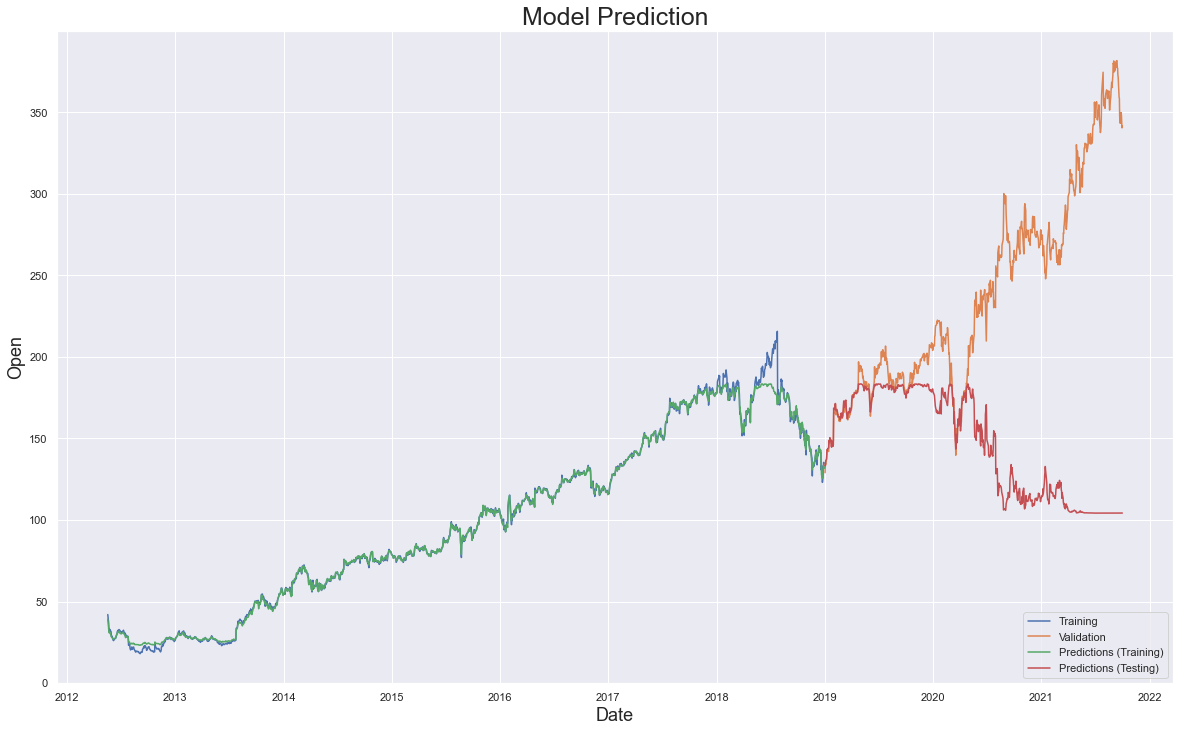

In [42]:
# Plot and visualize data
utilities.visualize(SVM_y_train_scaled, SVM_y_test_scaled, SVM_pred_train_2, SVM_pred_test_2, date_train, date_test)

# LSTM

## Method 1 (Scale -> Split -> Train)

In [43]:
# Normalize the price (High, Low and Close)
scaler_X = StandardScaler()
scaled_X = scaler_X.fit_transform(new_data[['High','Low','Close']])

df_price = pd.DataFrame(scaled_X, columns = ['High','Low','Close'])
df_open = new_data['Open']

combined_data = pd.concat([df_open.reset_index(drop=True),df_price.reset_index(drop=True)], axis=1)
combined_data.columns = new_data.columns
combined_data.index = new_data.index
combined_data.describe()

,Open,High,Low,Close
count,2359.000000,2.359000e+03,2.359000e+03,2.359000e+03
mean,139.606969,9.774104e-16,8.795188e-16,7.648726e-16
std,84.490691,1.000212e+00,1.000212e+00,1.000212e+00
min,18.080000,-1.439072e+00,-1.441171e+00,-1.442107e+00
25%,74.935001,-7.685393e-01,-7.652815e-01,-7.664533e-01
50%,130.979996,-1.050281e-01,-9.800941e-02,-1.017990e-01
75%,184.914993,5.336140e-01,5.441276e-01,5.403827e-01
max,381.679993,2.844990e+00,2.882752e+00,2.868476e+00


In [44]:
# Setting training data (from first date until end of 2018)
LSTM_training_data = combined_data.loc[:'2019-01-01']

LSTM_X_train = LSTM_training_data.drop(['Open'], axis = 1)
LSTM_y_train = LSTM_training_data['Open']

In [45]:
# Convert data into numpy array
LSTM_X_train, LSTM_y_train = np.array(LSTM_X_train), np.array(LSTM_y_train)

In [46]:
# Reshape the data
LSTM_X_train = np.reshape(LSTM_X_train, (LSTM_X_train.shape[0], LSTM_X_train.shape[1], 1))

In [47]:
# Setting testing data (from 2019 to 2021)
LSTM_testing_data = combined_data.loc['2019-01-01':]

LSTM_X_test = LSTM_testing_data.drop(['Open'], axis = 1)
LSTM_y_test = LSTM_testing_data['Open']

In [48]:
# Convert data into numpy array
LSTM_X_test, LSTM_y_test = np.array(LSTM_X_test), np.array(LSTM_y_test)

In [49]:
# Reshape the data
LSTM_X_test = np.reshape(LSTM_X_test, (LSTM_X_test.shape[0], LSTM_X_test.shape[1], 1))

In [50]:
# Run the experiments 10 times and save the best results
LSTM_best_1 = {"LSTM_pred_train":[],"LSTM_pred_test":[],"rmse_LSTM_train_1":[],"rmse_LSTM_test_1":[]}
for i in range(10):
    print("Experiment ", i+1)
    LSTM_pred_train, LSTM_pred_test, rmse_LSTM_train_1, rmse_LSTM_test_1 = \
    utilities.LSTM_fit_model(LSTM_X_train, LSTM_y_train, LSTM_X_test, LSTM_y_test)
    print(100*"=")
    LSTM_best_1["LSTM_pred_train"].append(LSTM_pred_train)
    LSTM_best_1["LSTM_pred_test"].append(LSTM_pred_test)
    LSTM_best_1["rmse_LSTM_train_1"].append(rmse_LSTM_train_1)
    LSTM_best_1["rmse_LSTM_test_1"].append(rmse_LSTM_test_1)

Experiment  1
Root Mean Square Error on training data:   1.0486256279614024
Root Mean Square Error on testing data:   42.170800708674555
Experiment  2
Root Mean Square Error on training data:   1.0341981812681462
Root Mean Square Error on testing data:   23.37709320083214
Experiment  3
Root Mean Square Error on training data:   1.0117588175892829
Root Mean Square Error on testing data:   32.29001094949402
Experiment  4
Root Mean Square Error on training data:   1.086401471533378
Root Mean Square Error on testing data:   18.28045743592703
Experiment  5
Root Mean Square Error on training data:   0.9974308369969662
Root Mean Square Error on testing data:   20.98225994045206
Experiment  6
Root Mean Square Error on training data:   0.9862159297046104
Root Mean Square Error on testing data:   32.13933090674333
Experiment  7
Root Mean Square Error on training data:   1.014075486903793
Root Mean Square Error on testing data:   25.099044795992217
Experiment  8
Root Mean Square Error on training

In [51]:
# Select the minimum test RMSE value and corresponding train RMSE value
min_test_LSTM_rmse_1 = min(LSTM_best_1["rmse_LSTM_test_1"])
min_test_LSTM_rmse_index_1 = LSTM_best_1["rmse_LSTM_test_1"].index(min_test_LSTM_rmse_1)
min_train_LSTM_rmse_1 = LSTM_best_1["rmse_LSTM_train_1"][min_test_LSTM_rmse_index_1]

print("Minimum test RMSE value:", min_test_LSTM_rmse_1)
print("Corresponding train RMSE value:", min_train_LSTM_rmse_1)

# Select the pred_train and _pred_test for the minimum test RMSE value
LSTM_pred_train = LSTM_best_1["LSTM_pred_train"][min_test_LSTM_rmse_index_1]
LSTM_pred_test = LSTM_best_1["LSTM_pred_test"][min_test_LSTM_rmse_index_1]

Minimum test RMSE value: 18.28045743592703
Corresponding train RMSE value: 1.086401471533378


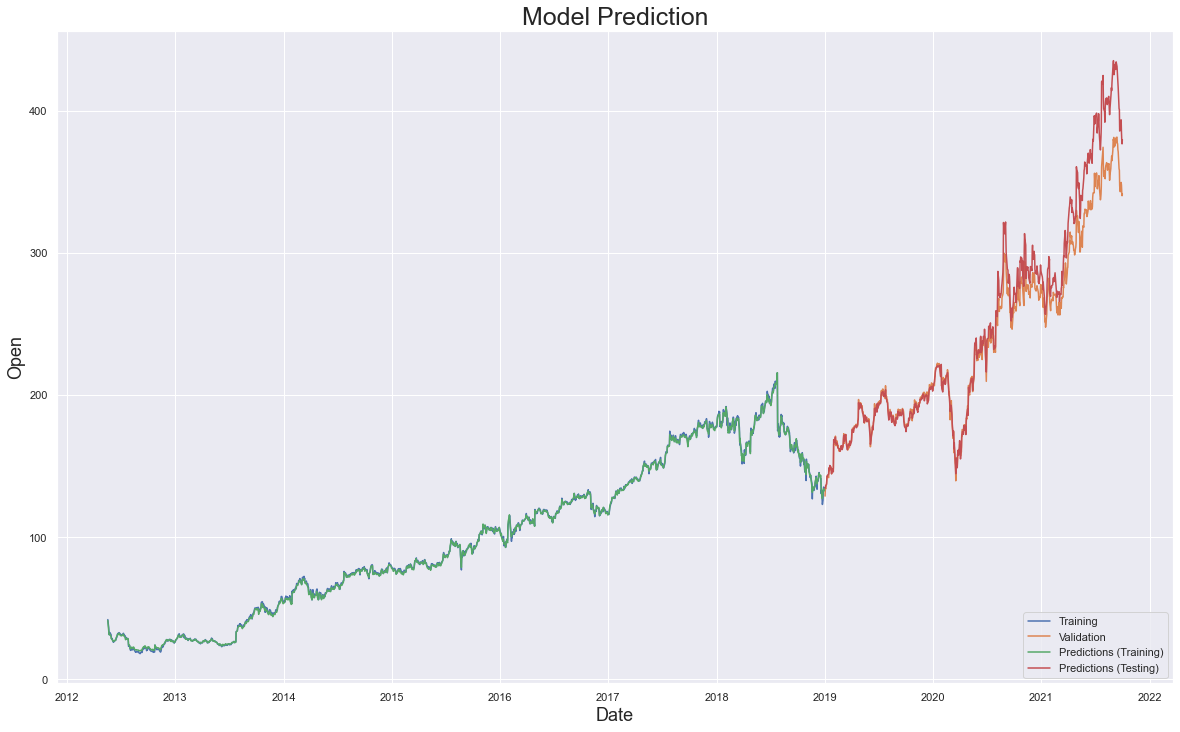

In [52]:
# Plot and visualize data
utilities.visualize(LSTM_y_train, LSTM_y_test, LSTM_pred_train, LSTM_pred_test, date_train, date_test)

## Method 2 (Split -> Scale -> Train) (More related to real world application)

In [53]:
# Display the data
new_data.head()

,Open,High,Low,Close
Date,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000
2012-05-21,36.529999,36.660000,33.000000,34.029999
2012-05-22,32.610001,33.590000,30.940001,31.000000
2012-05-23,31.370001,32.500000,31.360001,32.000000
2012-05-24,32.950001,33.209999,31.770000,33.029999


In [54]:
# Set the scaler for training data
scaler_X_LSTM_2 = StandardScaler()

In [55]:
# Split data before scaling (Method 2)
LSTM_training_data_no_scaled = new_data.loc[:'2019-01-01']

In [56]:
# Split data before scaling (Method 2)
LSTM_X_train_scaled = LSTM_training_data_no_scaled.drop(['Open'], axis = 1)
LSTM_y_train_scaled = LSTM_training_data_no_scaled['Open'].to_numpy()

LSTM_X_train_scaled = scaler_X_LSTM_2.fit_transform(LSTM_X_train_scaled.to_numpy())

# Reshape the data
LSTM_X_train_scaled = np.reshape(LSTM_X_train_scaled, (LSTM_X_train_scaled.shape[0], LSTM_X_train_scaled.shape[1], 1))

In [57]:
# Split data before scaling (Method 2)
LSTM_testing_data_no_scaled = new_data.loc['2019-01-01':]

In [58]:
# Split data before scaling (Method 2)
LSTM_X_test_scaled = LSTM_testing_data_no_scaled.drop(['Open'], axis = 1)
LSTM_y_test_scaled = LSTM_testing_data_no_scaled['Open'].to_numpy()

LSTM_X_test_scaled = scaler_X_LSTM_2.transform(LSTM_X_test_scaled.to_numpy())

# Reshape the data
LSTM_X_test_scaled = np.reshape(LSTM_X_test_scaled, (LSTM_X_test_scaled.shape[0], LSTM_X_test_scaled.shape[1], 1))

In [59]:
# Run the experiments 10 times and save the best results
LSTM_best_2 = {"LSTM_pred_train_2":[],"LSTM_pred_test_2":[],"rmse_LSTM_train_2":[],"rmse_LSTM_test_2":[]}
for i in range(10):
    print("Experiment ", i+1)
    LSTM_pred_train_2, LSTM_pred_test_2, rmse_LSTM_train_2, rmse_LSTM_test_2 = \
    utilities.LSTM_fit_model(LSTM_X_train, LSTM_y_train, LSTM_X_test, LSTM_y_test)
    print(100*"=")
    LSTM_best_2["LSTM_pred_train_2"].append(LSTM_pred_train_2)
    LSTM_best_2["LSTM_pred_test_2"].append(LSTM_pred_test_2)
    LSTM_best_2["rmse_LSTM_train_2"].append(rmse_LSTM_train_2)
    LSTM_best_2["rmse_LSTM_test_2"].append(rmse_LSTM_test_2)

Experiment  1
Root Mean Square Error on training data:   1.0337968370563697
Root Mean Square Error on testing data:   34.51892876306841
Experiment  2
Root Mean Square Error on training data:   0.9906134300648107
Root Mean Square Error on testing data:   40.162211147695935
Experiment  3
Root Mean Square Error on training data:   1.0094582495583106
Root Mean Square Error on testing data:   13.76537738775379
Experiment  4
Root Mean Square Error on training data:   0.9875612979550317
Root Mean Square Error on testing data:   46.15283582429319
Experiment  5
Root Mean Square Error on training data:   1.058881240325965
Root Mean Square Error on testing data:   23.25483786279921
Experiment  6
Root Mean Square Error on training data:   0.9712759055218881
Root Mean Square Error on testing data:   26.12101064709088
Experiment  7
Root Mean Square Error on training data:   0.9978933298678107
Root Mean Square Error on testing data:   17.91105479355522
Experiment  8
Root Mean Square Error on training

In [60]:
# Select the minimum test RMSE value and corresponding train RMSE value
min_test_LSTM_rmse_2 = min(LSTM_best_2["rmse_LSTM_test_2"])
min_test_LSTM_rmse_index_2 = LSTM_best_2["rmse_LSTM_test_2"].index(min_test_LSTM_rmse_2)
min_train_LSTM_rmse_2 = LSTM_best_2["rmse_LSTM_train_2"][min_test_LSTM_rmse_index_2]

print("Minimum test RMSE value:", min_test_LSTM_rmse_2)
print("Corresponding train RMSE value:", min_train_LSTM_rmse_2)

# Select the pred_train and _pred_test for the minimum test RMSE value
LSTM_pred_train_2 = LSTM_best_2["LSTM_pred_train_2"][min_test_LSTM_rmse_index_2]
LSTM_pred_test_2 = LSTM_best_2["LSTM_pred_test_2"][min_test_LSTM_rmse_index_2]

Minimum test RMSE value: 13.507468746306161
Corresponding train RMSE value: 0.960222170633739


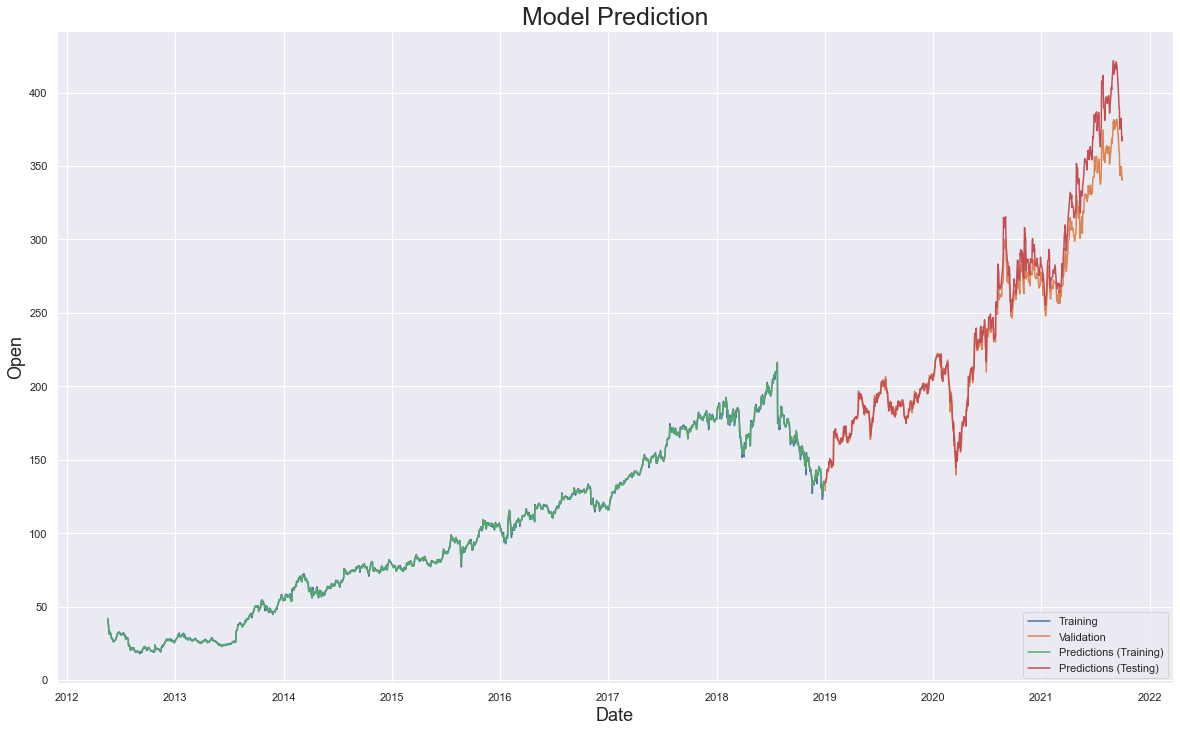

In [61]:
# Plot and visualize data
utilities.visualize(LSTM_y_train_scaled, LSTM_y_test_scaled, LSTM_pred_train_2, LSTM_pred_test_2, date_train, date_test)

## Evaluation

In [62]:
# Display the best training result
best_training_performance, name, method = \
utilities.best_training_performance(rmse_SVM_train_1, rmse_SVM_train_2, min_train_LSTM_rmse_1, min_train_LSTM_rmse_2)
print("Best performance for training is the", name, "model with method", method, ": ", best_training_performance)

Best performance for training is the LSTM model with method 2 :  0.960222170633739


In [63]:
# Display the best testing result
best_testing_performance, name, method = \
utilities.best_testing_performance(rmse_SVM_test_1, rmse_SVM_test_2, min_test_LSTM_rmse_1, min_test_LSTM_rmse_2)
print("Best performance for testing is the", name, "model with method", method, ": ", best_testing_performance)

Best performance for testing is the LSTM model with method 2 :  13.507468746306161
